In [1]:
import pandas as pd
import numpy as np

In [39]:
pd.options.display.max_columns = 100

In [13]:
park=pd.read_csv('tables/grid_park_size_dist.csv')
lst=pd.read_csv('tables/lst.csv')
ndbi=pd.read_csv('tables/ndbi.csv')
ndvi=pd.read_csv('tables/ndvi.csv')
albedo=pd.read_csv('tables/albedo.csv')
landuse=pd.read_csv('tables/landuse.csv')

/var/folders/ls/4rhr7kfj5nd_v0fn499s11hm0000gn/T/ipykernel_58613/1932195331.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  park=pd.read_csv('tables/grid_park_size_dist.csv')


In [4]:
park.head()

,GRID_ID,NEAR_FID,NEAR_DIST,PARK_ID,FID_1,OBJECTID,SITE_NAME,OWNERSHIP,PROTECTION,TYPECODE,...,ParcelNumb,YearAcquir,Shape_Leng,Shape_Area_1,area,size,park_ID_in,Shape_Length,Shape_Area,DIST_INT
0,FJ-627,535,0.0,535,535,3742,Neponset River Reservation II,Commonwealth of Massachusetts,A97/WPA/ACEC,2,...,,0,0.067082,0.000027,250672,2,535,120.0,900.0,0
1,FK-627,535,0.0,535,535,3742,Neponset River Reservation II,Commonwealth of Massachusetts,A97/WPA/ACEC,2,...,,0,0.067082,0.000027,250672,2,535,120.0,900.0,0
2,FI-626,535,0.0,535,535,3742,Neponset River Reservation II,Commonwealth of Massachusetts,A97/WPA/ACEC,2,...,,0,0.067082,0.000027,250672,2,535,120.0,900.0,0
3,FH-625,535,0.0,535,535,3742,Neponset River Reservation II,Commonwealth of Massachusetts,A97/WPA/ACEC,2,...,,0,0.067082,0.000027,250672,2,535,120.0,900.0,0
4,FI-625,535,0.0,535,535,3742,Neponset River Reservation II,Commonwealth of Massachusetts,A97/WPA/ACEC,2,...,,0,0.067082,0.000027,250672,2,535,120.0,900.0,0


In [7]:
park_clean=park[['GRID_ID', 'PARK_ID','NEAR_DIST', 'size', 'DIST_INT']]
park_clean.head()

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT
0,FJ-627,535,0.0,2,0
1,FK-627,535,0.0,2,0
2,FI-626,535,0.0,2,0
3,FH-625,535,0.0,2,0
4,FI-625,535,0.0,2,0


In [8]:
park_clean['DIST_INT'].describe()

count    134048.000000
mean          3.780623
std           2.811032
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max           7.000000
Name: DIST_INT, dtype: float64

In [9]:
park_clean['NEAR_DIST'].describe()

count    134048.000000
mean        198.578991
std         369.783526
min           0.000000
25%          10.012574
50%         101.346480
75%         224.985425
max        3406.651730
Name: NEAR_DIST, dtype: float64

<Axes: >

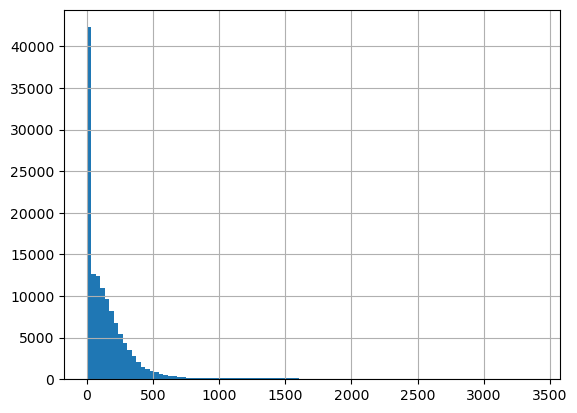

In [11]:
park_clean['NEAR_DIST'].hist(bins=100)

# Add Join to the LST table

In [14]:
lst.head()

,GRID_ID,ZONE_CODE,COUNT,AREA,MEAN
0,FJ-627,1,1.0,672.056395,23.571697
1,FK-627,2,1.0,672.056395,23.571697
2,FI-626,3,1.0,672.056395,24.410821
3,FH-625,4,2.0,1344.112789,26.281333
4,FI-625,5,1.0,672.056395,24.990176


In [16]:
lst.shape

(134048, 5)

In [17]:
park_clean.shape

(134048, 5)

In [18]:
df=lst.merge(park_clean, on='GRID_ID', how='left')

In [19]:
df

,GRID_ID,ZONE_CODE,COUNT,AREA,MEAN,PARK_ID,NEAR_DIST,size,DIST_INT
0,FJ-627,1,1.0,672.056395,23.571697,535,0.000000,2,0
1,FK-627,2,1.0,672.056395,23.571697,535,0.000000,2,0
2,FI-626,3,1.0,672.056395,24.410821,535,0.000000,2,0
3,FH-625,4,2.0,1344.112789,26.281333,535,0.000000,2,0
4,FI-625,5,1.0,672.056395,24.990176,535,0.000000,2,0
...,...,...,...,...,...,...,...,...,...
134043,TG-3,134044,1.0,672.056395,35.194674,273,488.761412,3,7
134044,TH-3,134045,1.0,672.056395,35.088716,273,468.532922,3,7
134045,TI-3,134046,1.0,672.056395,35.088716,273,449.397909,3,7
134046,TF-2,134047,2.0,1344.112789,34.965667,273,531.177938,3,7


In [21]:
df=df[['GRID_ID', 'PARK_ID', 'NEAR_DIST', 'size', 'DIST_INT', 'MEAN']]
df.rename(columns={'MEAN': 'AVG_LST'}, inplace=True)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST
0,FJ-627,535,0.000000,2,0,23.571697
1,FK-627,535,0.000000,2,0,23.571697
2,FI-626,535,0.000000,2,0,24.410821
3,FH-625,535,0.000000,2,0,26.281333
4,FI-625,535,0.000000,2,0,24.990176
...,...,...,...,...,...,...
134043,TG-3,273,488.761412,3,7,35.194674
134044,TH-3,273,468.532922,3,7,35.088716
134045,TI-3,273,449.397909,3,7,35.088716
134046,TF-2,273,531.177938,3,7,34.965667


## Add Join landuse

In [22]:
ndbi.head()

,GRID_ID,ZONE_CODE,COUNT,AREA,MEAN
0,FJ-627,1,1.0,672.056395,-0.333245
1,FK-627,2,1.0,672.056395,-0.333245
2,FI-626,3,1.0,672.056395,-0.337267
3,FH-625,4,2.0,1344.112789,-0.379787
4,FI-625,5,1.0,672.056395,-0.355980


In [25]:
df=df.merge(ndbi[['GRID_ID','MEAN']], on='GRID_ID', how='left')
df.rename(columns={'MEAN': 'AVG_NDBI'}, inplace=True)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI
0,FJ-627,535,0.000000,2,0,23.571697,-0.333245
1,FK-627,535,0.000000,2,0,23.571697,-0.333245
2,FI-626,535,0.000000,2,0,24.410821,-0.337267
3,FH-625,535,0.000000,2,0,26.281333,-0.379787
4,FI-625,535,0.000000,2,0,24.990176,-0.355980
...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,3,7,35.194674,-0.038473
134044,TH-3,273,468.532922,3,7,35.088716,-0.008430
134045,TI-3,273,449.397909,3,7,35.088716,-0.008430
134046,TF-2,273,531.177938,3,7,34.965667,-0.002630


In [26]:
ndvi.head()

,GRID_ID,ZONE_CODE,COUNT,AREA,MEAN
0,FJ-627,1,1.0,672.056395,0.666224
1,FK-627,2,1.0,672.056395,0.666224
2,FI-626,3,1.0,672.056395,0.499395
3,FH-625,4,2.0,1344.112789,0.696165
4,FI-625,5,1.0,672.056395,0.603090


In [27]:
df=df.merge(ndvi[['GRID_ID','MEAN']], on='GRID_ID', how='left')
df.rename(columns={'MEAN': 'AVG_NDVI'}, inplace=True)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI
0,FJ-627,535,0.000000,2,0,23.571697,-0.333245,0.666224
1,FK-627,535,0.000000,2,0,23.571697,-0.333245,0.666224
2,FI-626,535,0.000000,2,0,24.410821,-0.337267,0.499395
3,FH-625,535,0.000000,2,0,26.281333,-0.379787,0.696165
4,FI-625,535,0.000000,2,0,24.990176,-0.355980,0.603090
...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,3,7,35.194674,-0.038473,0.220771
134044,TH-3,273,468.532922,3,7,35.088716,-0.008430,0.172586
134045,TI-3,273,449.397909,3,7,35.088716,-0.008430,0.172586
134046,TF-2,273,531.177938,3,7,34.965667,-0.002630,0.142920


In [28]:
df=df.merge(albedo[['GRID_ID','MEAN']], on='GRID_ID', how='left')
df.rename(columns={'MEAN': 'AVG_ALBEDO'}, inplace=True)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO
0,FJ-627,535,0.000000,2,0,23.571697,-0.333245,0.666224,0.169425
1,FK-627,535,0.000000,2,0,23.571697,-0.333245,0.666224,0.169425
2,FI-626,535,0.000000,2,0,24.410821,-0.337267,0.499395,0.117571
3,FH-625,535,0.000000,2,0,26.281333,-0.379787,0.696165,0.193749
4,FI-625,535,0.000000,2,0,24.990176,-0.355980,0.603090,0.159078
...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,3,7,35.194674,-0.038473,0.220771,0.174343
134044,TH-3,273,468.532922,3,7,35.088716,-0.008430,0.172586,0.189531
134045,TI-3,273,449.397909,3,7,35.088716,-0.008430,0.172586,0.189531
134046,TF-2,273,531.177938,3,7,34.965667,-0.002630,0.142920,0.168245


In [29]:
landuse.head()

,GRID_ID,ZONE_CODE,COUNT,AREA,MAJORITY,OBJECTID,Value,Count_1,USE_CODE_R
0,FJ-627,1,900.0,900.0,1,1,1,57418141.0,Other
1,FK-627,2,900.0,900.0,1,1,1,57418141.0,Other
2,FI-626,3,900.0,900.0,1,1,1,57418141.0,Other
3,FH-625,4,900.0,900.0,1,1,1,57418141.0,Other
4,FI-625,5,900.0,900.0,1,1,1,57418141.0,Other


In [30]:
df=df.merge(landuse[['GRID_ID','USE_CODE_R']], on='GRID_ID', how='left')
df.rename(columns={'USE_CODE_R': 'LANDUSE'}, inplace=True)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE
0,FJ-627,535,0.000000,2,0,23.571697,-0.333245,0.666224,0.169425,Other
1,FK-627,535,0.000000,2,0,23.571697,-0.333245,0.666224,0.169425,Other
2,FI-626,535,0.000000,2,0,24.410821,-0.337267,0.499395,0.117571,Other
3,FH-625,535,0.000000,2,0,26.281333,-0.379787,0.696165,0.193749,Other
4,FI-625,535,0.000000,2,0,24.990176,-0.355980,0.603090,0.159078,Other
...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,3,7,35.194674,-0.038473,0.220771,0.174343,Industrial
134044,TH-3,273,468.532922,3,7,35.088716,-0.008430,0.172586,0.189531,Industrial
134045,TI-3,273,449.397909,3,7,35.088716,-0.008430,0.172586,0.189531,Industrial
134046,TF-2,273,531.177938,3,7,34.965667,-0.002630,0.142920,0.168245,Industrial


In [31]:
df.describe()

,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO
count,134048.000000,134048.000000,134048.000000,134048.000000,134048.000000,134048.000000,134048.000000,134048.000000
mean,292.938007,198.578991,0.924154,3.780623,32.206800,-0.184338,0.366917,0.175837
std,159.785752,369.783526,1.232212,2.811032,4.451291,0.119688,0.201343,0.037312
min,0.000000,0.000000,0.000000,0.000000,16.829653,-0.628275,-0.250089,0.059288
25%,159.000000,10.012574,0.000000,1.000000,29.920670,-0.266420,0.195932,0.155458
50%,281.000000,101.346480,0.000000,4.000000,32.663203,-0.179487,0.364105,0.170296
75%,457.000000,224.985425,2.000000,7.000000,34.938323,-0.095073,0.523093,0.189747
max,535.000000,3406.651730,4.000000,7.000000,53.899789,0.369192,0.804230,1.190010


In [32]:
df.to_csv('tables/merged.csv', index=False)

In [33]:
df['size'] = df['size'].map(lambda x: f'size{x}')
df


,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE
0,FJ-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other
1,FK-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other
2,FI-626,535,0.000000,size2,0,24.410821,-0.337267,0.499395,0.117571,Other
3,FH-625,535,0.000000,size2,0,26.281333,-0.379787,0.696165,0.193749,Other
4,FI-625,535,0.000000,size2,0,24.990176,-0.355980,0.603090,0.159078,Other
...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,size3,7,35.194674,-0.038473,0.220771,0.174343,Industrial
134044,TH-3,273,468.532922,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial
134045,TI-3,273,449.397909,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial
134046,TF-2,273,531.177938,size3,7,34.965667,-0.002630,0.142920,0.168245,Industrial


In [34]:
df['size'].value_counts()

size
size0    72866
size1    25679
size2    15479
size3    12852
size4     7172
Name: count, dtype: int64

# Model

## 1. Data Prep

In [36]:
import statsmodels.api as sm


In [37]:
size_dummies = pd.get_dummies(df['size'], prefix='size', drop_first=True)
df = pd.concat([df, size_dummies], axis=1)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE,size_size1,size_size2,size_size3,size_size4
0,FJ-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,False,True,False,False
1,FK-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,False,True,False,False
2,FI-626,535,0.000000,size2,0,24.410821,-0.337267,0.499395,0.117571,Other,False,True,False,False
3,FH-625,535,0.000000,size2,0,26.281333,-0.379787,0.696165,0.193749,Other,False,True,False,False
4,FI-625,535,0.000000,size2,0,24.990176,-0.355980,0.603090,0.159078,Other,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,size3,7,35.194674,-0.038473,0.220771,0.174343,Industrial,False,False,True,False
134044,TH-3,273,468.532922,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,False,False,True,False
134045,TI-3,273,449.397909,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,False,False,True,False
134046,TF-2,273,531.177938,size3,7,34.965667,-0.002630,0.142920,0.168245,Industrial,False,False,True,False


In [38]:
landuse_dummies = pd.get_dummies(df['LANDUSE'], prefix='landuse', drop_first=True)
df = pd.concat([df, landuse_dummies], axis=1)
df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE,...,size_size3,size_size4,landuse_Industrial,landuse_Open Space,landuse_Other,landuse_Residential_High,landuse_Residential_Low,landuse_Residential_Medium,landuse_Residential_Mixed,landuse_Residential_Vacant
0,FJ-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,...,False,False,False,False,True,False,False,False,False,False
1,FK-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,...,False,False,False,False,True,False,False,False,False,False
2,FI-626,535,0.000000,size2,0,24.410821,-0.337267,0.499395,0.117571,Other,...,False,False,False,False,True,False,False,False,False,False
3,FH-625,535,0.000000,size2,0,26.281333,-0.379787,0.696165,0.193749,Other,...,False,False,False,False,True,False,False,False,False,False
4,FI-625,535,0.000000,size2,0,24.990176,-0.355980,0.603090,0.159078,Other,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,size3,7,35.194674,-0.038473,0.220771,0.174343,Industrial,...,True,False,True,False,False,False,False,False,False,False
134044,TH-3,273,468.532922,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,...,True,False,True,False,False,False,False,False,False,False
134045,TI-3,273,449.397909,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,...,True,False,True,False,False,False,False,False,False,False
134046,TF-2,273,531.177938,size3,7,34.965667,-0.002630,0.142920,0.168245,Industrial,...,True,False,True,False,False,False,False,False,False,False


In [40]:
for column in size_dummies.columns:
    df[f'dist_{column}'] = df['DIST_INT'] * df[column]

df

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE,size_size1,size_size2,size_size3,size_size4,landuse_Industrial,landuse_Open Space,landuse_Other,landuse_Residential_High,landuse_Residential_Low,landuse_Residential_Medium,landuse_Residential_Mixed,landuse_Residential_Vacant,dist_size_size1,dist_size_size2,dist_size_size3,dist_size_size4
0,FJ-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0
1,FK-627,535,0.000000,size2,0,23.571697,-0.333245,0.666224,0.169425,Other,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0
2,FI-626,535,0.000000,size2,0,24.410821,-0.337267,0.499395,0.117571,Other,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0
3,FH-625,535,0.000000,size2,0,26.281333,-0.379787,0.696165,0.193749,Other,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0
4,FI-625,535,0.000000,size2,0,24.990176,-0.355980,0.603090,0.159078,Other,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488.761412,size3,7,35.194674,-0.038473,0.220771,0.174343,Industrial,False,False,True,False,True,False,False,False,False,False,False,False,0,0,7,0
134044,TH-3,273,468.532922,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,False,False,True,False,True,False,False,False,False,False,False,False,0,0,7,0
134045,TI-3,273,449.397909,size3,7,35.088716,-0.008430,0.172586,0.189531,Industrial,False,False,True,False,True,False,False,False,False,False,False,False,0,0,7,0
134046,TF-2,273,531.177938,size3,7,34.965667,-0.002630,0.142920,0.168245,Industrial,False,False,True,False,True,False,False,False,False,False,False,False,0,0,7,0


In [45]:
df.to_csv('tables/model_prepped.csv', index=False)

## 2. Configure and Run the Regression Model

In [42]:
print(df.dtypes)


GRID_ID                        object
PARK_ID                         int64
NEAR_DIST                     float64
size                           object
DIST_INT                        int64
AVG_LST                       float64
AVG_NDBI                      float64
AVG_NDVI                      float64
AVG_ALBEDO                    float64
LANDUSE                        object
size_size1                       bool
size_size2                       bool
size_size3                       bool
size_size4                       bool
landuse_Industrial               bool
landuse_Open Space               bool
landuse_Other                    bool
landuse_Residential_High         bool
landuse_Residential_Low          bool
landuse_Residential_Medium       bool
landuse_Residential_Mixed        bool
landuse_Residential_Vacant       bool
dist_size_size1                 int64
dist_size_size2                 int64
dist_size_size3                 int64
dist_size_size4                 int64
dtype: objec

In [48]:
# Independent variables
X_vars = ['AVG_NDBI', 'AVG_NDVI', 'AVG_ALBEDO',
          'landuse_Industrial', 'landuse_Open Space', 'landuse_Other',
          'landuse_Residential_High', 'landuse_Residential_Low', 'landuse_Residential_Medium',
          'landuse_Residential_Mixed', 'landuse_Residential_Vacant',
          
          'size_size1', 'size_size2', 'size_size3', 'size_size4', 'DIST_INT', 
          
          'dist_size_size1', 'dist_size_size2', 'dist_size_size3', 'dist_size_size4']

# Note: Convert boolean columns to int if necessary (though it should be handled correctly by statsmodels)
df[X_vars] = df[X_vars].astype(int)

X = df[X_vars]
y = df['AVG_LST']

# Add a constant to the model (intercept)
X = sm.add_constant(X)


In [49]:
# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                AVG_LST   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     4076.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:25:40   Log-Likelihood:            -3.6110e+05
No. Observations:              134048   AIC:                         7.222e+05
Df Residuals:                  134029   BIC:                         7.224e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model 2


In [50]:
water=pd.read_csv('tables/water.csv')
water.head()

,Shape_Length,Shape_Area,GRID_ID,NEAR_FID,NEAR_DIST,PARK_ID,DIST_INT,NEAR_FID_WAT,NEAR_DIST_WAT,DIST_INT_WT
0,120.0,900.0,FJ-627,15255,0.000000,535,0,15255,0.000000,0
1,120.0,900.0,FK-627,15255,26.328900,535,0,15255,26.328900,1
2,120.0,900.0,FI-626,15255,0.000000,535,0,15255,0.000000,0
3,120.0,900.0,FH-625,15255,20.096104,535,0,15255,20.096104,1
4,120.0,900.0,FI-625,15255,19.966513,535,0,15255,19.966513,1


In [51]:
df2=df.merge(water[['GRID_ID','DIST_INT_WT']], on='GRID_ID', how='left')
df2.rename(columns={'DIST_INT_WT': 'DIST_INT_WATER'}, inplace=True)
df2

,GRID_ID,PARK_ID,NEAR_DIST,size,DIST_INT,AVG_LST,AVG_NDBI,AVG_NDVI,AVG_ALBEDO,LANDUSE,size_size1,size_size2,size_size3,size_size4,landuse_Industrial,landuse_Open Space,landuse_Other,landuse_Residential_High,landuse_Residential_Low,landuse_Residential_Medium,landuse_Residential_Mixed,landuse_Residential_Vacant,dist_size_size1,dist_size_size2,dist_size_size3,dist_size_size4,DIST_INT_WATER
0,FJ-627,535,0,size2,0,23.571697,0,0,0,Other,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,FK-627,535,0,size2,0,23.571697,0,0,0,Other,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,FI-626,535,0,size2,0,24.410821,0,0,0,Other,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,FH-625,535,0,size2,0,26.281333,0,0,0,Other,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,FI-625,535,0,size2,0,24.990176,0,0,0,Other,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134043,TG-3,273,488,size3,7,35.194674,0,0,0,Industrial,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,6
134044,TH-3,273,468,size3,7,35.088716,0,0,0,Industrial,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,5
134045,TI-3,273,449,size3,7,35.088716,0,0,0,Industrial,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,4
134046,TF-2,273,531,size3,7,34.965667,0,0,0,Industrial,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,7


In [52]:
print(df2.dtypes)


GRID_ID                        object
PARK_ID                         int64
NEAR_DIST                       int64
size                           object
DIST_INT                        int64
AVG_LST                       float64
AVG_NDBI                        int64
AVG_NDVI                        int64
AVG_ALBEDO                      int64
LANDUSE                        object
size_size1                      int64
size_size2                      int64
size_size3                      int64
size_size4                      int64
landuse_Industrial              int64
landuse_Open Space              int64
landuse_Other                   int64
landuse_Residential_High        int64
landuse_Residential_Low         int64
landuse_Residential_Medium      int64
landuse_Residential_Mixed       int64
landuse_Residential_Vacant      int64
dist_size_size1                 int64
dist_size_size2                 int64
dist_size_size3                 int64
dist_size_size4                 int64
DIST_INT_WAT

In [53]:
# Independent variables
X_vars_wt = ['AVG_NDBI', 'AVG_NDVI', 'AVG_ALBEDO',
          'landuse_Industrial', 'landuse_Open Space', 'landuse_Other',
          'landuse_Residential_High', 'landuse_Residential_Low', 'landuse_Residential_Medium',
          'landuse_Residential_Mixed', 'landuse_Residential_Vacant',
          
          'size_size1', 'size_size2', 'size_size3', 'size_size4', 'DIST_INT', 
          
          'dist_size_size1', 'dist_size_size2', 'dist_size_size3', 'dist_size_size4',
          'DIST_INT_WATER']

# Note: Convert boolean columns to int if necessary (though it should be handled correctly by statsmodels)
df2[X_vars_wt] = df2[X_vars_wt].astype(int)



In [54]:
X_2 = df2[X_vars_wt]
y_2 = df2['AVG_LST']

# Add a constant to the model (intercept)
X_2 = sm.add_constant(X_2)


In [55]:
# Fit the model
model_2 = sm.OLS(y_2, X_2).fit()

# Print the model summary
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                AVG_LST   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     4113.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:40:27   Log-Likelihood:            -3.5958e+05
No. Observations:              134048   AIC:                         7.192e+05
Df Residuals:                  134028   BIC:                         7.194e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [57]:
# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X_2.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(len(X_2.columns))]

# Display the VIFs
print(vif_data)


/Users/gigisung/anaconda3/envs/eda/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       feature        VIF
0                        const  20.156153
1                     AVG_NDBI        NaN
2                     AVG_NDVI        NaN
3                   AVG_ALBEDO   1.000526
4           landuse_Industrial   1.250256
5           landuse_Open Space   1.000762
6                landuse_Other   2.771311
7     landuse_Residential_High   1.095442
8      landuse_Residential_Low   2.273511
9   landuse_Residential_Medium   1.917393
10   landuse_Residential_Mixed   1.178368
11  landuse_Residential_Vacant   1.052386
12                  size_size1   3.676170
13                  size_size2   2.409723
14                  size_size3   2.390312
15                  size_size4   1.634598
16                    DIST_INT   2.360097
17             dist_size_size1   3.844483
18             dist_size_size2   2.123365
19             dist_size_size3   2.114214
20             dist_size_size4   1.325274
21              DIST_INT_WATER   1.088996


## Model Evaluation

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

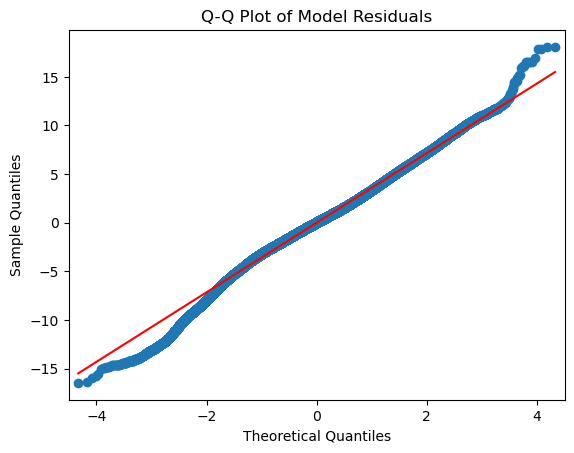

Shapiro-Wilk test for normality of residuals:
ShapiroResult(statistic=0.9921247959136963, pvalue=0.0)


/Users/gigisung/anaconda3/envs/eda/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [60]:
# Generate Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Model Residuals')
plt.show()

# Perform a Shapiro-Wilk test for normality
print("Shapiro-Wilk test for normality of residuals:")
print(stats.shapiro(model.resid[model.resid.abs() < 5000]))  # Limiting to a subset due to test limitations


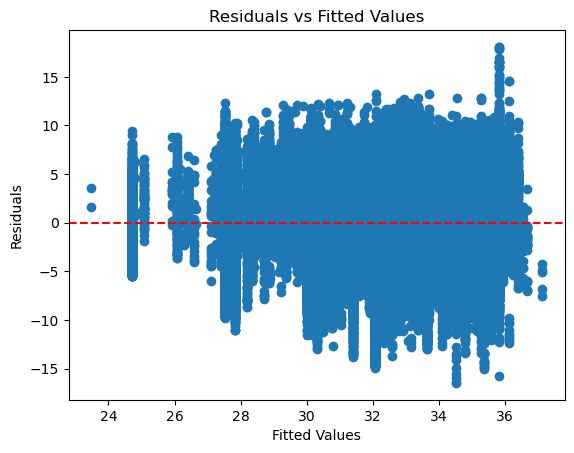

In [61]:
# Plot residuals
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [62]:
# Check Durbin-Watson statistic
print("Durbin-Watson statistic:", sm.stats.durbin_watson(model.resid))


Durbin-Watson statistic: 0.12809343095329595
